<a href="https://colab.research.google.com/github/macorony/Breast_cancer_ML/blob/main/notebooks/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy import sparse # The most important part of scipy is sparse providing sparse matrices.
import matplotlib.pyplot as plt
%matplotlib inline
# Render a figure in the notebook rather than display a object.
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn.datasets import load_breast_cancer

In [3]:
# load the dataset
breast_cancer = load_breast_cancer()
# Convert to Pandas DataFrame
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# Add target column
df['target'] = breast_cancer.target

In [4]:
# Characterize the dataset
print("First 5 rows:\n", df.head())
print("\nShape of data:", df.shape)
print("\nData type of each variable:\n", df.dtypes)
print("\nDescription of data:\n", df.describe())
print("\nInformation of columns:\n", df.info())

First 5 rows:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [11]:
# detect missing values
print(f'There are { df.isnull().sum()} missing values in the training data')

There are mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64 missing values in the training data


<Axes: >

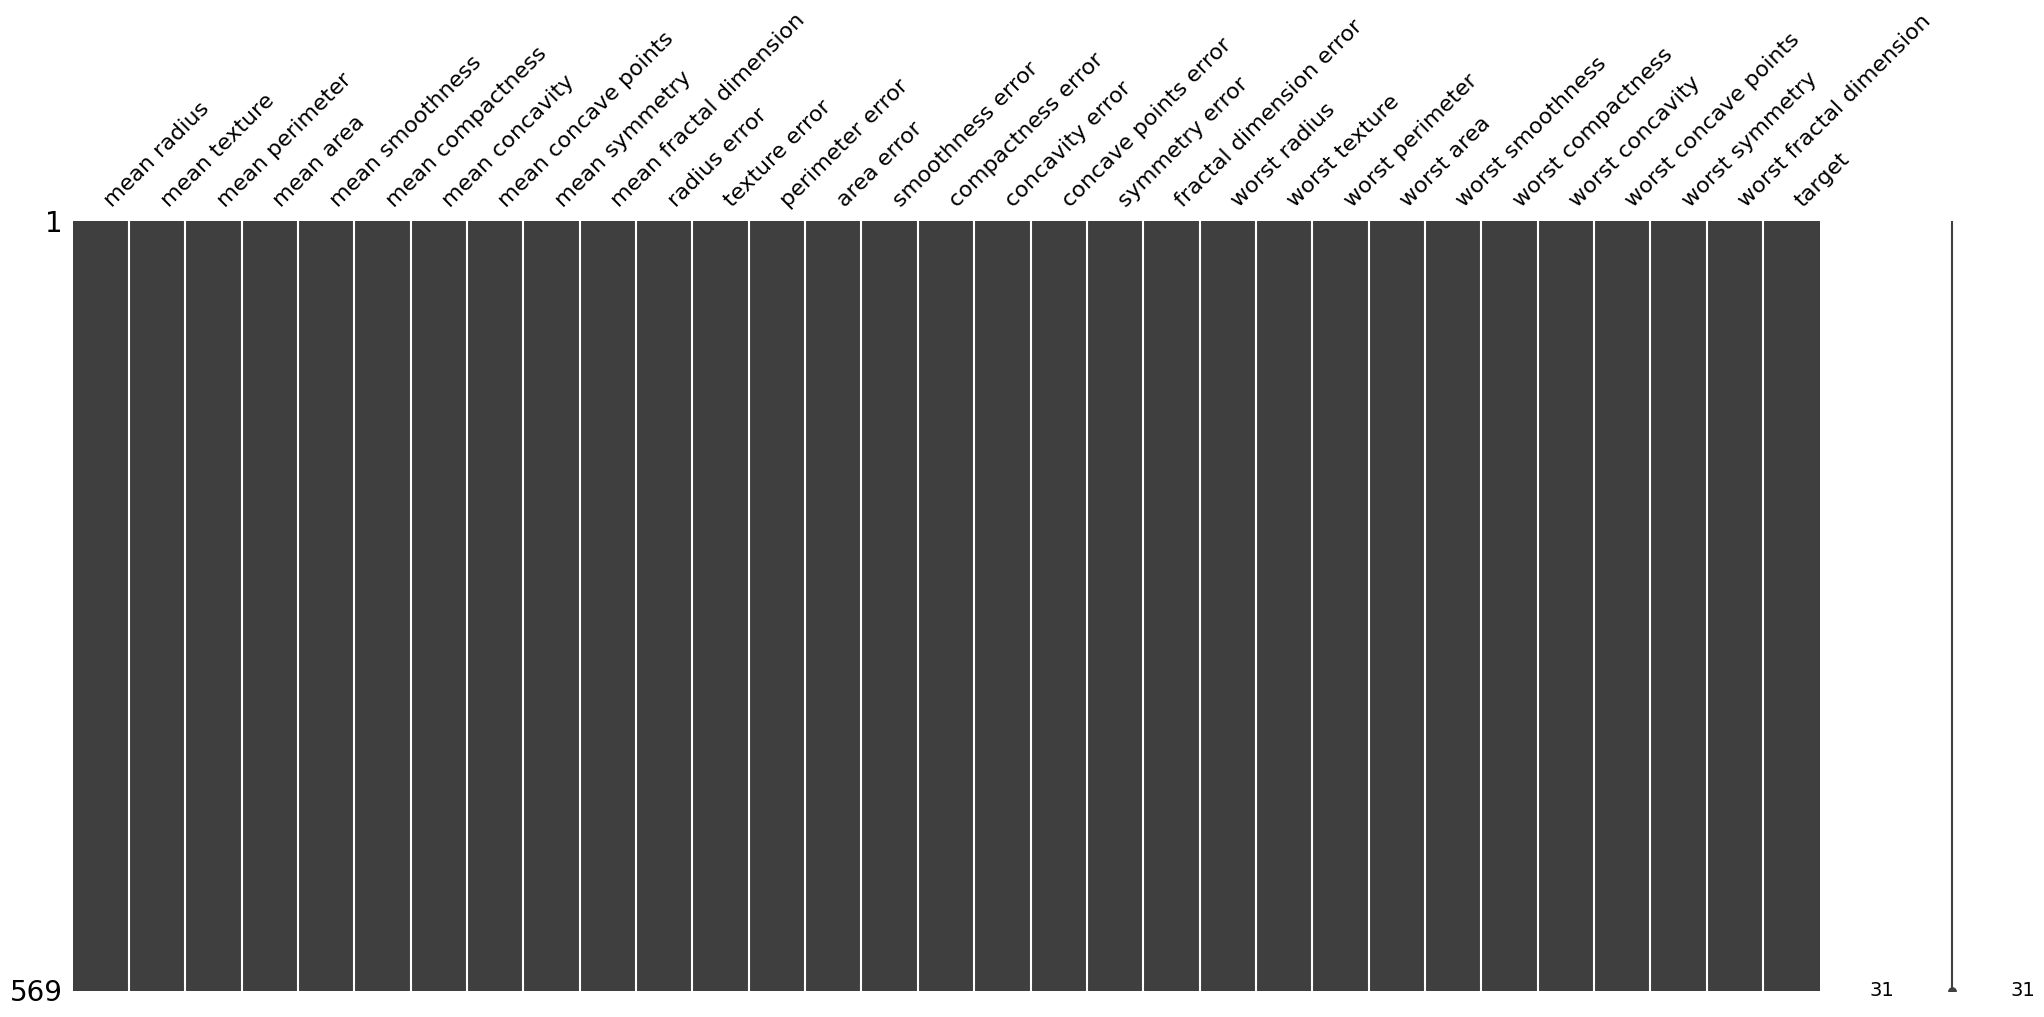

In [10]:
msno.matrix(df)

Target Variable Value Counts:
 target
1    357
0    212
Name: count, dtype: int64


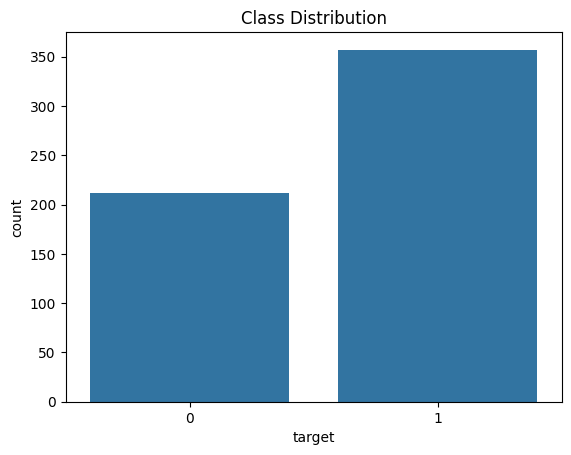

In [12]:
# Target Variable Analysis
print("Target Variable Value Counts:\n", df['target'].value_counts())
sns.countplot(data=df,x="target")
plt.title("Class Distribution")
plt.show()

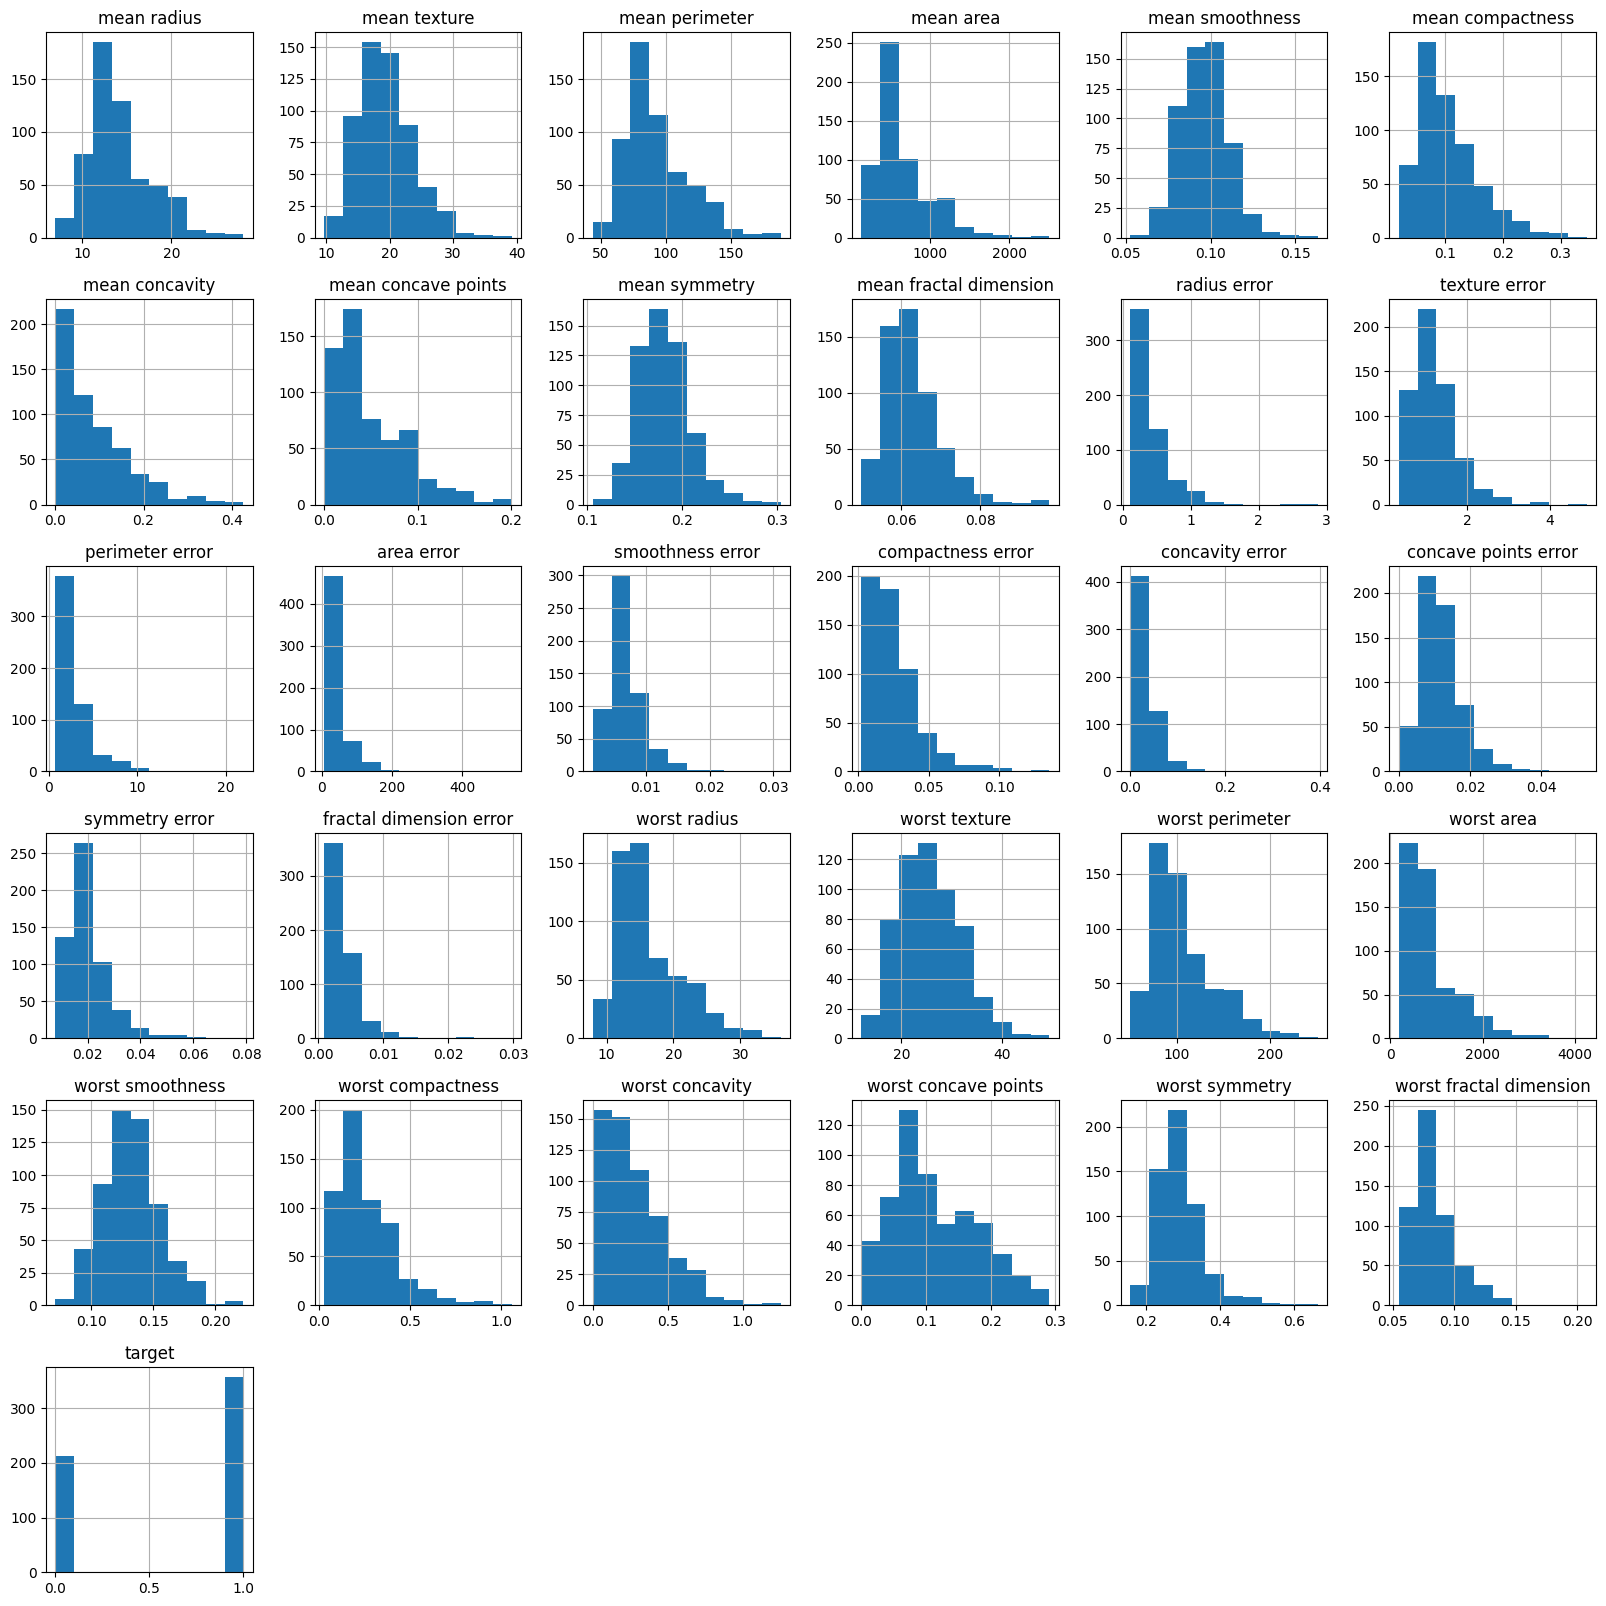

In [17]:
# Histograms
df.hist(figsize=(20, 20))
plt.show()

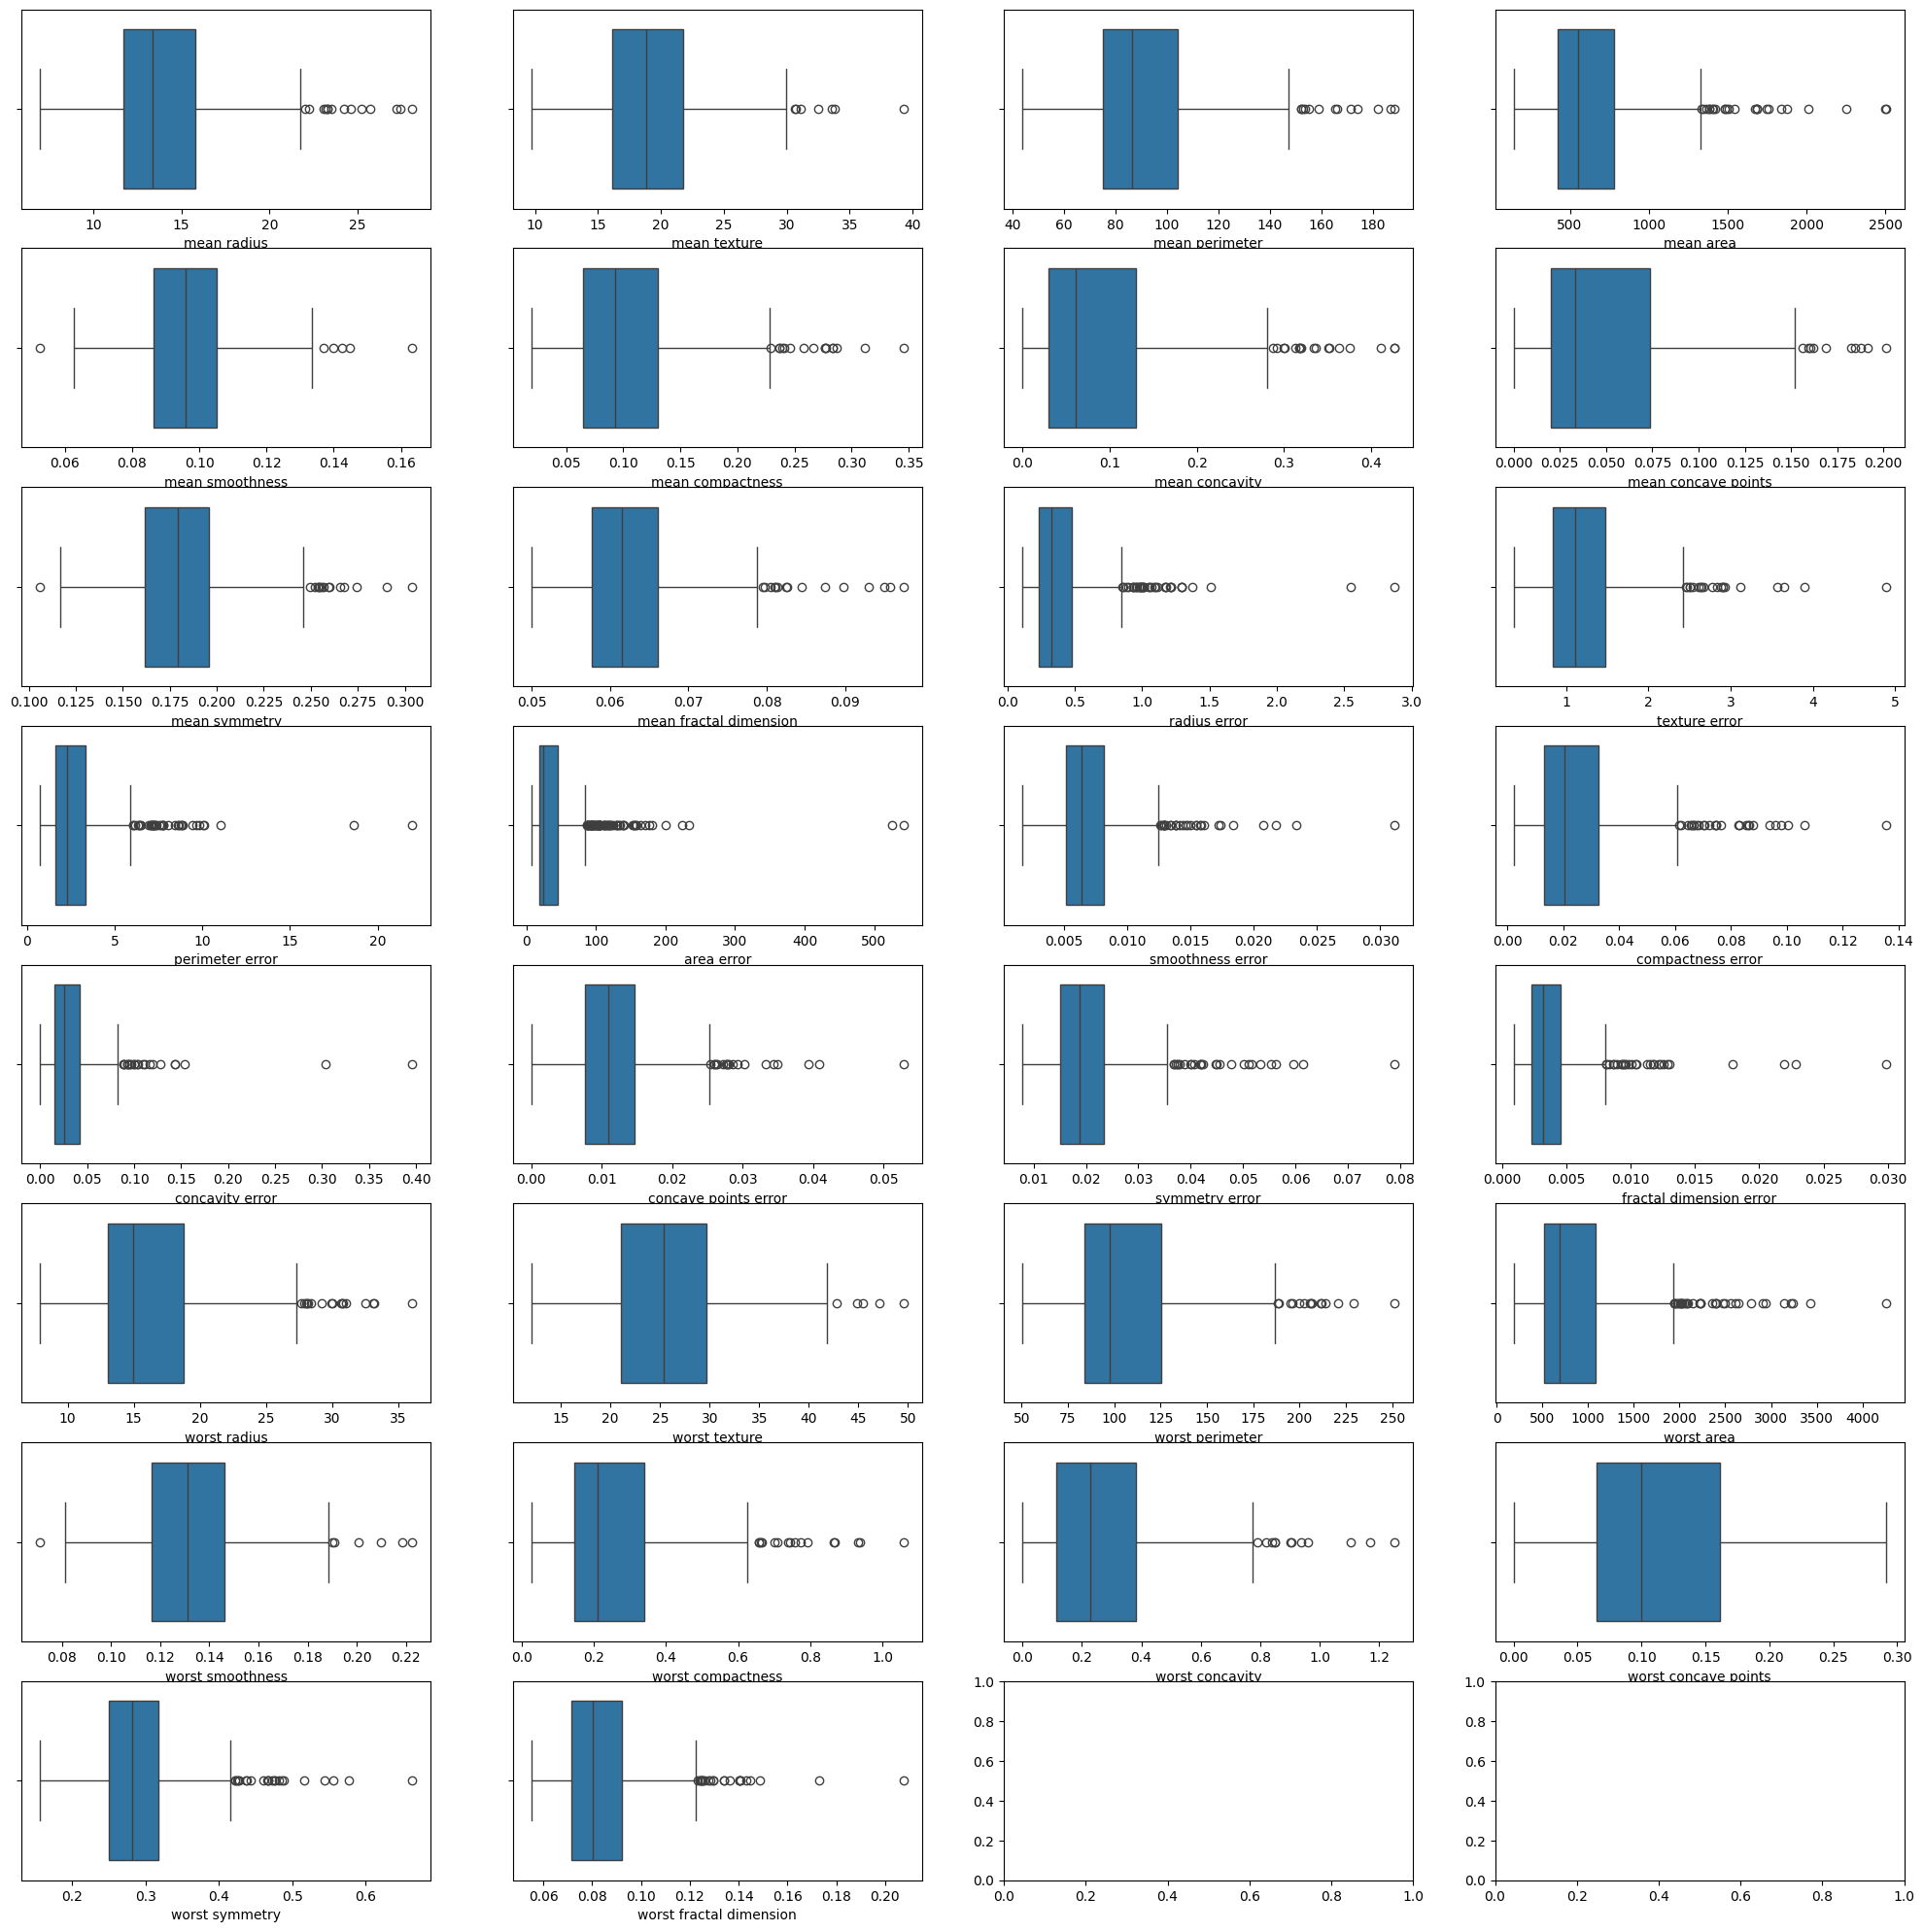

In [14]:
# Boxplots
fig, axes = plt.subplots(8, 4, figsize=(25, 25))
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(ax = axes[i // 4, i% 4], data = df, x = col)
plt.show()

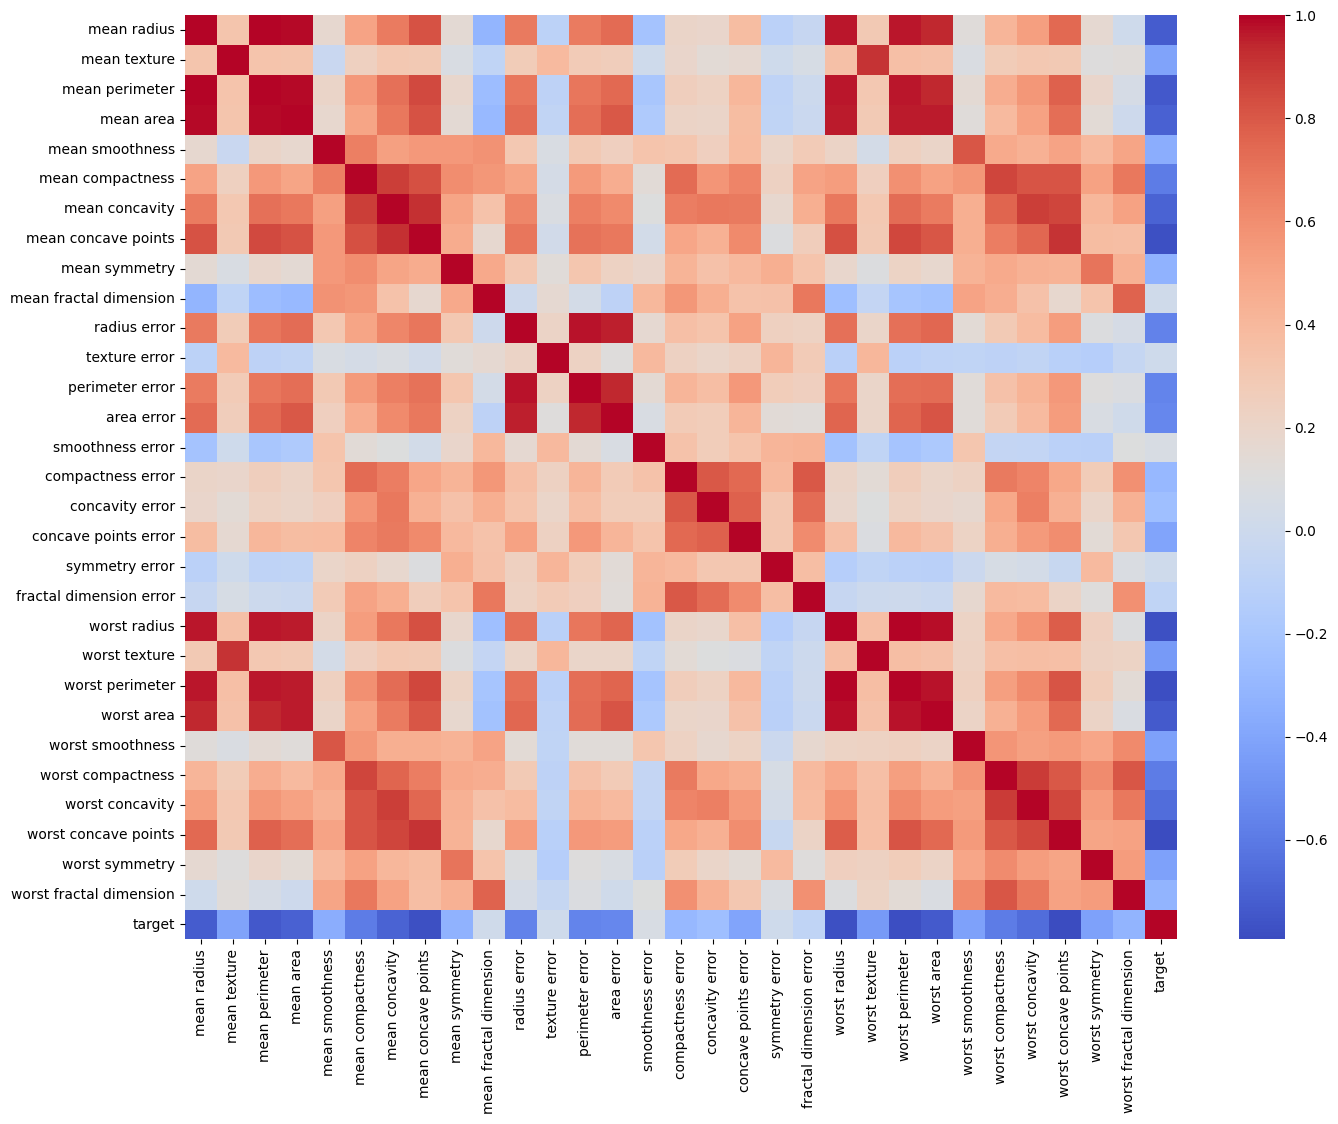

In [15]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

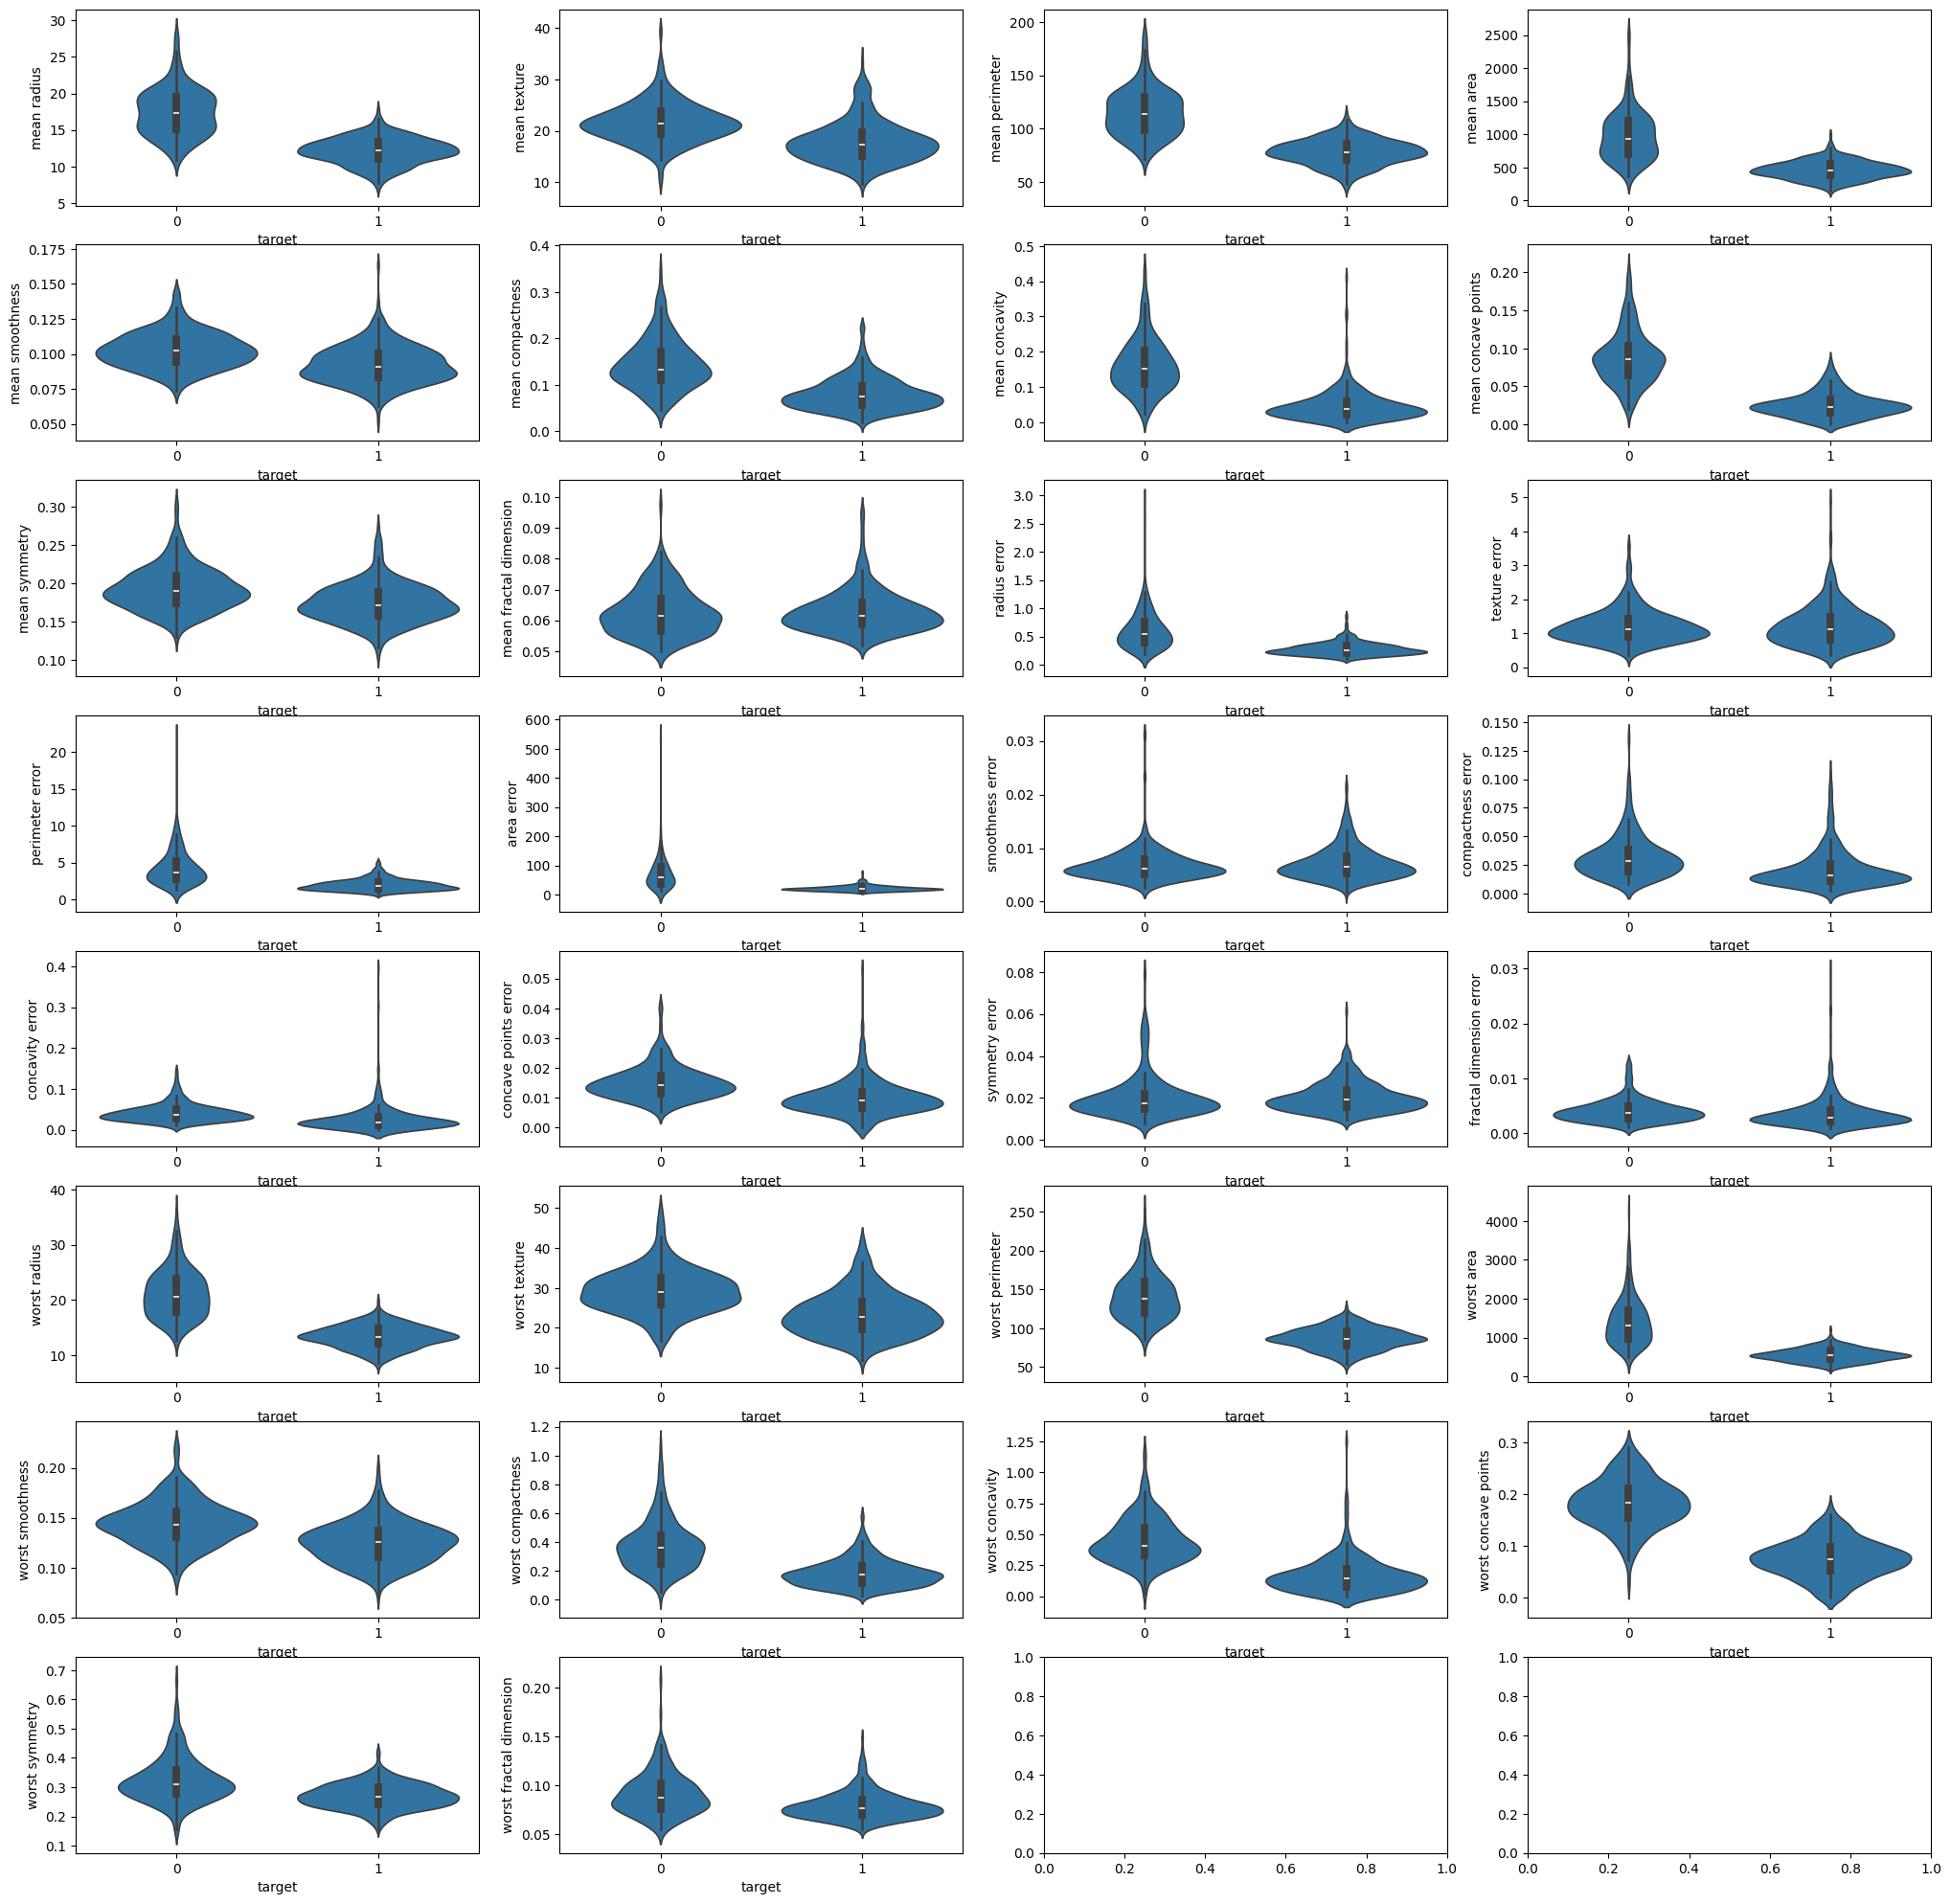

In [16]:
# Violin Plots
fig, axes = plt.subplots(8, 4, figsize=(25, 25))
for i, col in enumerate(df.columns[:-1]):
    sns.violinplot(ax = axes[i // 4, i % 4], data = df, x="target", y=col)
plt.show()